# Serine/Cysteine biosynthesis pathway benchmark analysis

###Benchmark pathway

http://metacyc.org/META/NEW-IMAGE?type=PATHWAY&object=SERSYN-PWY

http://metacyc.org/META/NEW-IMAGE?type=PATHWAY&object=CYSTSYN-PWY

Caspi et al, Nucleic Acids Research 42:D459-D471 2014

###Import libraries

In [1]:
%pylab inline
import sys
sys.path.append('/trombone1/home/scalhoun/bin/repo')

from analyze_test import pathens
from analyze_test import pathstring_to_table
import numpy as np
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


###Define file locations, input enzymes/ligands, and true pathway

In [7]:
picklefile = './output/ser_2sd.pickle'
datafile = './data/ser_data.h5'
enzs = ['1', '2', '3', '4', '5']
ligands = ['ZINC03869933',
           'ZINC03869279',
           'ZINC03869280',
           'ZINC00895034',
           'ZINC00895446',
           'ZINC00895042']

###Load the pathway models from the output pickle file and data

In [8]:
pE = pathens(datafile=datafile)
pE.set_all_enzymes(enzs)
pE.set_true_enzymes(enzs)
pE.set_true_ligands(ligands)
pE.set_true_path()
pE.load_data_from_analysis_pickle(picklefile)
pE.make_position_matrices()
print 'Number of unique paths: %d' % len(pE.uniqpathstrs)
print 'Number of clusters: %d' % np.max(pE.flatclusters)

Number of unique paths: 91
Number of clusters: 5


###Find the rank of the pathway model that matches the true pathway

In [9]:
score = pE.np_path_array['obj'][pE.np_path_array['strrepr'] == pE.true_path]
print 'Rank of true path: %d' % (np.sum(pE.np_path_array['obj'] > score) + 1)
HTML(pathstring_to_table(pE.true_path))

Rank of true path: 1


,1,,2,,3,,4,,5,


##Entropy by position

For the ensemble of pathway models, determine the entropy averaged over positions, occurrence of correct interactions (averaged over all pathway positions), and ranks of correct components at each position

In [10]:
pE.evaluate_accuracy_precision()

Mean Entropy: 1.261
Mean Interaction Weight: 0.726
Mean Ranks over Position: 1.818
  Components appearing at position: 11.0


###Rank of substrate and product to their corresponding enzyme

In [11]:
HTML(pE.ligand_rankings_html())

Enzyme,Substrate rank from individual docking run,Product rank from individual docking run,Substrate rank by integrated approach,Product rank by integrated approach,Interaction rank by integrated approach
1,3351,3276,1,1,2
2,9,6,1,1,1
3,4,250,1,1,1
4,913,806,1,1,2
5,2003,1472,1,1,1


###Frequency of enzyme occuring in pathway model ensemble at every position

In [12]:
HTML(pE.enzyme_pos_html())

,1,2,3,4,5
1,37.4,62.6,0.0,0.0,0.0
2,0.0,35.2,64.8,0.0,0.0
3,1.1,2.2,35.2,61.5,0.0
4,0.0,0.0,0.0,38.5,61.5
5,61.5,0.0,0.0,0.0,38.5


##Accuracy by position

By position going across, the component (metabolite or protein) is ordered vertically by frequency occuring at that position in the ensemble of pathway models

In [13]:
HTML(pE.get_html_table(percent_cutoff=.05, enz_percent_cutoff=0.15, 
                       urlstring_to_image='http://zinc.docking.org/img/sub/%s.gif'))

###Test to evaluate the sampling coverage. 
For an increasing number of runs, the number of unique clusters observed from those runs were plotted. For each N number of runs, the cluster counts were repeated 50 times with a different group of N runs chosen at random.

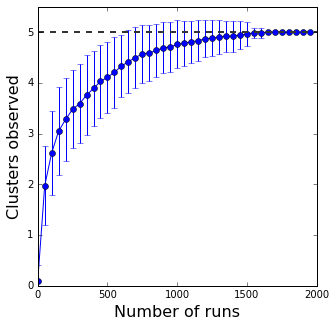

In [15]:
pE.plot_convergence_by_runs(run_increment=50)

__________________________________________________

## Predicting serine biosynthesis pathway with dummy enzyme in candidate set in place of known enzyme

###In the candidate set of enzymes, we replaced one enzyme with a dummy enzyme and test whether we can still reconstruct the pathway.

In [16]:
picklefile = './output/ser_dummy_1sd.pickle'
datafile = './data/ser_data.h5'
enzs = ['1', '2', '3', 'D', '5']
ligands = ['ZINC03869933',
           'ZINC03869279',
           'ZINC03869280',
           'ZINC00895034',
           'ZINC00895446',
           'ZINC00895042']

###Load the pathway models from the output pickle file and data

In [17]:
pE = pathens(datafile=datafile)
pE.set_all_enzymes(enzs)
pE.set_true_enzymes(enzs)
pE.set_true_ligands(ligands)
pE.set_true_path()
pE.load_data_from_analysis_pickle(picklefile)
pE.make_position_matrices()
print 'Number of unique paths: %d' % len(pE.uniqpathstrs)

Number of unique paths: 213


###Find the rank of the pathway model that matches the true pathway with the dummy enzyme in place of the missing enzyme

In [18]:
score = pE.np_path_array['obj'][pE.np_path_array['strrepr'] == pE.true_path]
print 'Rank of correct path: %d' % (np.sum(pE.np_path_array['obj'] > score) + 1)
HTML(pathstring_to_table(pE.true_path))

Rank of correct path: 1


,1,,2,,3,,D,,5,


###Rank of substrate and product to their corresponding enzyme

In [19]:
HTML(pE.ligand_rankings_html())

Enzyme,Substrate rank from individual docking run,Product rank from individual docking run,Substrate rank by integrated approach,Product rank by integrated approach,Interaction rank by integrated approach
1,3351,3276,25,10,41
2,9,6,1,1,1
3,4,250,1,1,1
D,-1,-1,13,13,19
5,2003,1472,7,6,11


###Frequency of enzyme occuring in pathway model ensemble at every position

In [20]:
HTML(pE.enzyme_pos_html())

,1,2,3,D,5
1,5.6,50.2,0.0,42.7,1.4
2,43.2,3.8,50.2,2.8,0.0
3,8.5,0.5,3.8,3.8,83.6
4,38.5,45.5,0.5,4.7,10.8
5,4.2,0.0,45.5,46.0,4.2
